In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
np.where(df_train.Item_Weight=='')

(array([], dtype=int64),)

In [6]:
df_train.Item_Weight.mean()

12.857645184135976

In [7]:
df_train['Item_Weight'].fillna(df_train.Item_Weight.mean(),inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.Item_Fat_Content.value_counts().to_dict()

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [10]:
df_train['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low fat': 0},inplace=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [12]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
df_item_type = pd.get_dummies(df_train['Item_Type'],prefix='Item_Type')
df_item_type

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
df_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df_train['Outlet_Size'].isnull().sum()

2410

In [17]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [19]:
df_train['Outlet_Size'].value_counts().to_dict()

{'Medium': 5203, 'Small': 2388, 'High': 932}

In [20]:
df_train['Outlet_Size'].replace({'Medium': 1, 'Small': 0, 'High': 2},inplace=True)

In [21]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,Tier 3,Supermarket Type2,1845.5976


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [23]:
df_train['Outlet_Location_Type'].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [24]:
df_train['Outlet_Location_Type'].replace({'Tier 3': 2, 'Tier 2': 1, 'Tier 1': 0})

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()

encoder.fit_transform(df_train['Outlet_Location_Type'])

array([0, 2, 0, ..., 1, 2, 0])

In [27]:
df_train['Outlet_Location_Type'] = encoder.fit_transform(df_train['Outlet_Location_Type'])


In [28]:
df_train['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int32

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 765.9+ KB


In [30]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
df_train['Outlet_Type'] = encoder.fit_transform(df_train['Outlet_Type'])

In [32]:
df_train['Outlet_Type']

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 8523, dtype: int32

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(3)
memory usage: 732.6+ KB


In [34]:
df = pd.concat([df_train,df_item_type],axis=1)

In [35]:
df['Outlet_Age'] =(df['Outlet_Establishment_Year']-2022)*(-1)

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,0,0,23
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,0,0,0,1,0,13
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,0,0,0,1,0,0,0,0,0,23
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,0,0,0,0,0,24
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,2,...,0,0,1,0,0,0,0,0,0,35


In [37]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,2,1845.5976


In [38]:
x = df.drop(['Item_Identifier','Item_Type','Item_Outlet_Sales','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
y = df['Item_Outlet_Sales']

In [39]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Age
0,9.300,0,0.016047,249.8092,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,23
1,5.920,1,0.019278,48.2692,1,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,13
2,17.500,0,0.016760,141.6180,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,23
3,19.200,1,0.000000,182.0950,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
4,8.930,0,0.000000,53.8614,2,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,2,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,35
8519,8.380,1,0.046982,108.1570,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,20
8520,10.600,0,0.035186,85.1224,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,18
8521,7.210,1,0.145221,103.1332,1,2,2,0,0,0,...,0,0,0,0,0,0,1,0,0,13


In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Size                      8523 non-null   int64  
 5   Outlet_Location_Type             8523 non-null   int32  
 6   Outlet_Type                      8523 non-null   int32  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

In [41]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6818, 24), (1705, 24), (6818,), (1705,))

In [45]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
## testing Data Evalution

y_pred = model.predict(x_test)
y_pred

array([4277.765 , 3135.918 , 1146.5076, ...,  490.0288, 1665.8316,
       1725.7536])

In [47]:
acc = r2_score(y_test,y_pred)
acc

0.17771104214393707

In [48]:
## training Data Evalution

y_pred_train = model.predict(x_train)

acc_train = r2_score(y_train,y_pred_train)
acc_train

1.0

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = lr_model.predict(x_test)

acc = r2_score(y_test,y_pred)
acc

0.5190454012404895

In [52]:
mse = mean_squared_error(y_test,y_pred)
mse

1427671.3055262375

In [53]:
mbe = mean_absolute_error(y_test,y_pred)
mbe

893.9174087791449

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
y_pred = RF_model.predict(x_test)

acc = r2_score(y_test,y_pred)
acc

0.5658962490997783

In [57]:
y_pred_rf = RF_model.predict(x_train)

acc = r2_score(y_train,y_pred_rf)
acc

0.9365479020150572

C:\Users\RJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

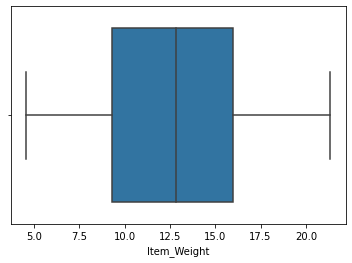

In [58]:
sns.boxplot(df_train['Item_Weight'])

In [59]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [60]:
hyp_model = RandomForestRegressor(verbose=True)
hyp = {'n_estimators':np.arange(100,200,10),
    'max_depth':np.arange(1,10),
    'min_samples_split':np.arange(1,10),
    'min_samples_leaf':np.arange(1,10)}

rsv = RandomizedSearchCV(hyp_model,hyp,cv=5)
rsv.fit(x_train,y_train)




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(verbose=True),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])})

In [61]:
rsv.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4,
                      n_estimators=130, verbose=True)

In [62]:
final_model = rsv.best_estimator_
final_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.3s finished


RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4,
                      n_estimators=130, verbose=True)

In [63]:
y_pred_hyp = final_model.predict(x_test)

acc = r2_score(y_test,y_pred_hyp)
acc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.0s finished


0.6058779596621681

In [64]:
import pickle

with open('rf_model.pkl','wb') as file:
    pickle.dump(final_model,file)

In [65]:
y_pred_hyp_train = final_model.predict(x_train)

acc = r2_score(y_train,y_pred_hyp_train)
acc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.0s finished


0.6073588819918885

In [66]:
d = final_model.feature_importances_
d

array([4.03789131e-04, 8.93193785e-05, 3.05349821e-03, 5.40965498e-01,
       2.89153791e-06, 2.07679237e-06, 4.00051618e-01, 7.66201604e-05,
       4.68190501e-05, 0.00000000e+00, 3.46814551e-05, 2.06954505e-05,
       9.25399942e-05, 5.87627458e-04, 0.00000000e+00, 2.51846364e-05,
       4.69982388e-04, 4.32978754e-05, 4.41834916e-07, 0.00000000e+00,
       3.54538056e-04, 2.54732179e-05, 1.80264040e-05, 5.36353810e-02])

In [67]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Age'],
      dtype='object')

In [68]:
ser = pd.Series(d,index=x.columns)
ser

Item_Weight                        4.037891e-04
Item_Fat_Content                   8.931938e-05
Item_Visibility                    3.053498e-03
Item_MRP                           5.409655e-01
Outlet_Size                        2.891538e-06
Outlet_Location_Type               2.076792e-06
Outlet_Type                        4.000516e-01
Item_Type_Baking Goods             7.662016e-05
Item_Type_Breads                   4.681905e-05
Item_Type_Breakfast                0.000000e+00
Item_Type_Canned                   3.468146e-05
Item_Type_Dairy                    2.069545e-05
Item_Type_Frozen Foods             9.253999e-05
Item_Type_Fruits and Vegetables    5.876275e-04
Item_Type_Hard Drinks              0.000000e+00
Item_Type_Health and Hygiene       2.518464e-05
Item_Type_Household                4.699824e-04
Item_Type_Meat                     4.329788e-05
Item_Type_Others                   4.418349e-07
Item_Type_Seafood                  0.000000e+00
Item_Type_Snack Foods              3.545

<AxesSubplot:>

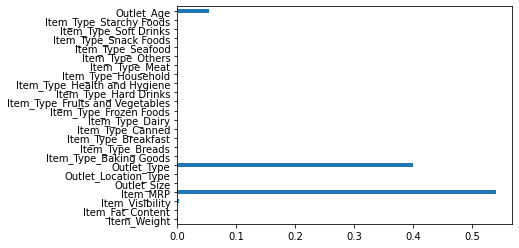

In [69]:
ser.plot(kind='barh')

In [70]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,0,0,23
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,0,0,0,1,0,13
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,0,0,0,1,0,0,0,0,0,23
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,0,0,0,0,0,24
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,2,...,0,0,1,0,0,0,0,0,0,35


In [71]:
df.Outlet_Size.value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [72]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [73]:
# ccp = model.cost_complexity_pruning_path(x_train,y_train)
# ccp_apha = ccp['ccp_alphas']

In [74]:
# train_acc = []
# test_acc = []
# for i in ccp_apha:
#     model_ccp = DecisionTreeRegressor(ccp_alpha = i)
#     model_ccp.fit(x_train,y_train)
    
#     acc_train = model_ccp.score(x_train,y_train)
#     train_acc.append(acc_train)
    
#     acc_test = model_ccp.score(x_test,y_test)
#     test_acc.append(acc_test)
    

In [86]:
x_train.columns.to_listist()

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Age']

In [88]:
dict1 = { 'col': x_train.columns.to_list()}
dict1

{'col': ['Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type',
  'Item_Type_Baking Goods',
  'Item_Type_Breads',
  'Item_Type_Breakfast',
  'Item_Type_Canned',
  'Item_Type_Dairy',
  'Item_Type_Frozen Foods',
  'Item_Type_Fruits and Vegetables',
  'Item_Type_Hard Drinks',
  'Item_Type_Health and Hygiene',
  'Item_Type_Household',
  'Item_Type_Meat',
  'Item_Type_Others',
  'Item_Type_Seafood',
  'Item_Type_Snack Foods',
  'Item_Type_Soft Drinks',
  'Item_Type_Starchy Foods',
  'Outlet_Age']}

In [89]:
import json

with open('feature.json','w') as file:
    json.dump(dict1,file,indent=2)
        

In [91]:
column = json.load(open('feature.json','r'))
column['col']

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Age']

In [95]:
list1 =column['col']
print(list1)

list1.index('Item_Type_Dairy')

['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Age']


11

In [ ]:
##arr[list_col.index(Item_Type)] = 1

In [83]:
import json
json.dumps(['foo', {'bar': ('baz', None, 1.0, 2)}])


'["foo", {"bar": ["baz", null, 1.0, 2]}]'

In [77]:
df_train.Outlet_Type.value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64